In [ ]:
# Question 6: Vickie / Jonathan

In [1]:
!pip install sqlalchemy
!pip install matplotlib
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("car_sales.db")

df = pd.read_csv("Online_Cars_Sale_Marketplace_Data.csv")
df.to_sql("car_sales", conn, if_exists="replace", index=False)

9379

In [2]:
alter_table = """
ALTER TABLE car_sales
ADD COLUMN Region TEXT;

"""

conn.execute(alter_table)

In [3]:
update_table = """
UPDATE car_sales
SET Region = CASE
    WHEN state IN ('ME', 'VT', 'NH', 'MA', 'RI', 'CT', 'NY', 'PA', 'NJ','DE') THEN 'Northeast'
    WHEN state IN ('WI', 'MI', 'IL', 'IN', 'OH', 'ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO') THEN 'Midwest'
    WHEN state IN ('MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'OK', 'TX') THEN 'South'
    WHEN state IN ('WA', 'OR', 'ID', 'MT', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'AK', 'HI') THEN 'West'
    ELSE NULL
END;
"""
conn.execute(update_table)

In [10]:
q0 = """
PRAGMA table_info(car_sales)
"""
pd.set_option('display.max_columns', 999)
pd.read_sql(q0,conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Year,INTEGER,0,None,0
1,1,Make,TEXT,0,None,0
2,2,Model,TEXT,0,None,0
3,3,Used/New,TEXT,0,None,0
4,4,Price,TEXT,0,None,0
5,5,ConsumerRating,REAL,0,None,0
6,6,ConsumerReviews,INTEGER,0,None,0
7,7,SellerType,TEXT,0,None,0
8,8,SellerName,TEXT,0,None,0
9,9,SellerRating,REAL,0,None,0


In [15]:
# Are there common characteristics per car for sale when compared to region? (drivetrain, MaxMPG, Fueltype, Price) 
q1 = """
SELECT
Region,
ROUND(AVG(MinMPG)) AS Average_Min_MPG,
ROUND(AVG(MaxMPG)) AS Average_Max_MPG
FROM car_sales
GROUP BY Region
HAVING Region IS NOT NULL
ORDER BY Average_Max_MPG DESC
;
"""

pd.set_option('display.max_rows', 1000)
pd.read_sql(q1,conn)

,Region,Average_Min_MPG,Average_Max_MPG
0,West,26.0,32.0
1,South,22.0,29.0
2,Northeast,22.0,28.0
3,Midwest,22.0,28.0


In [44]:
# Fueltype by Region
q1_1_1 = """
SELECT
Region,
COALESCE(SUM(CASE WHEN FuelType = 'Gasoline' OR FuelType LIKE 'Electric Fuel%' THEN 1 ELSE 0 END), 0) AS Gasoline,
COALESCE(SUM(CASE WHEN FuelType LIKE '%Diesel%' THEN 1 ELSE 0 END), 0) AS Diesel,
COALESCE(SUM(CASE WHEN FuelType LIKE '%Hybrid%' OR FuelType LIKE '%Plug-In%' THEN 1 ELSE 0 END), 0) AS Hybrid,
COALESCE(SUM(CASE WHEN FuelType = 'Electric' THEN 1 ELSE 0 END), 0) AS Electric
FROM car_sales
GROUP BY Region
HAVING Region IS NOT NULL
LIMIT 4;
"""

pd.set_option('display.max_rows', 1000)
pd.read_sql(q1_1_1,conn)

,Region,Gasoline,Diesel,Hybrid,Electric
0,Midwest,1999,7,18,20
1,Northeast,1574,1,10,12
2,South,3862,24,32,53
3,West,1450,14,15,77


In [53]:
# DriveTrain by Region
q1_1_2 = """
SELECT
Region,
COALESCE(SUM(CASE WHEN DriveTrain = '4WD' OR DriveTrain = 'Four-Wheel Drive' THEN 1 ELSE 0 END), 0) AS '4WD',
COALESCE(SUM(CASE WHEN DriveTrain = 'AWD' OR DriveTrain = 'All-Wheel Drive'THEN 1 ELSE 0 END), 0) AS 'AWD',
COALESCE(SUM(CASE WHEN DriveTrain = 'FWD' OR DriveTrain LIKE 'Front%' THEN 1 ELSE 0 END), 0) AS 'FWD',
COALESCE(SUM(CASE WHEN DriveTrain = 'RWD' OR DriveTrain = 'Rear-wheel Drive' THEN 1 ELSE 0 END), 0) AS 'RWD'
FROM car_sales
GROUP BY Region
HAVING Region IS NOT NULL
LIMIT 4;
"""

pd.set_option('display.max_rows', 1000)
pd.read_sql(q1_1_2,conn)

,Region,4WD,AWD,FWD,RWD
0,Midwest,1,3,394,38
1,Northeast,0,0,145,40
2,South,11,8,1470,616
3,West,8,23,355,233


In [6]:
# Are there common characteristics per car for sale when compared to region? (drivetrain, MaxMPG, Fueltype, Price) 
q1_1 = """
SELECT
Region,
AVG(ROUND(CASE 
    WHEN Price NOT LIKE '$%' THEN NULL 
    ELSE CAST(REPLACE(REPLACE(Price, '$', ''), ',', '') AS DECIMAL(6,2)) 
END)) AS Average_Price 
FROM car_sales
GROUP BY Region
HAVING Region IS NOT NULL
ORDER BY AVerage_Price DESC

"""

pd.set_option('display.max_rows', 1000)
pd.read_sql(q1_1,conn)

,Region,Average_Price
0,West,41901.529781
1,South,40465.582901
2,Northeast,39372.941358
3,Midwest,37177.717777


In [7]:
# Are there common characteristics per car for sale when compared to region? (drivetrain, MaxMPG, Fueltype, Price) 
q1_2 = """
SELECT
Region,
FuelType, 
COUNT(FuelType) AS Total
FROM car_sales
GROUP BY Region, FuelType
HAVING Region IS NOT NULL
ORDER BY Total DESC
"""

pd.set_option('display.max_rows', 1000)
pd.read_sql(q1_2,conn)

,Region,FuelType,Total
0,South,Gasoline,3860
1,Midwest,Gasoline,1998
2,Northeast,Gasoline,1573
3,West,Gasoline,1449
4,West,Electric,77
5,South,Electric,53
6,South,E85 Flex Fuel,46
7,South,Hybrid,30
8,Midwest,E85 Flex Fuel,27
9,West,E85 Flex Fuel,27


In [8]:
# Which region has the most and which region has the least number of listings? 

q2 = """
SELECT 
Region, 
COUNT(*) AS Listings
FROM car_sales
WHERE State NOT IN (
"AZ-101",
"Bldg",
"Michigan",
"RT",
"SE",
"Suite",
"US-12",
"US-169",
"Glens"
)
GROUP BY Region
ORDER BY listings DESC
;
"""
pd.read_sql(q2,conn)

,Region,Listings
0,South,4050
1,Midwest,2088
2,Northeast,1621
3,West,1595


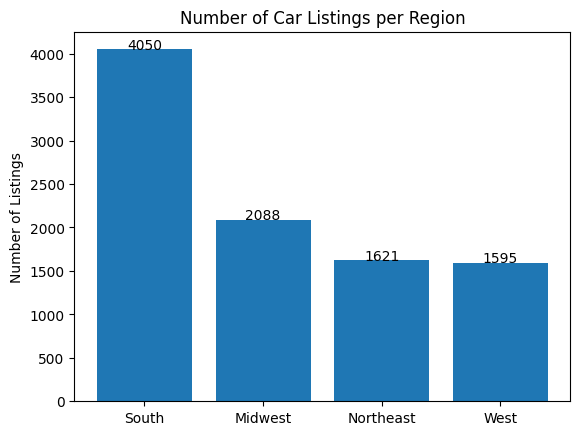

In [9]:
from sqlalchemy import create_engine

query2 = """
SELECT Region, COUNT(*) AS listings
FROM car_sales
WHERE State NOT IN (
"AZ-101",
"Bldg",
"Michigan",
"RT",
"SE",
"Suite",
"US-12",
"US-169",
"Glens"
)
GROUP BY Region
ORDER BY listings DESC
;
"""

df2 = pd.read_sql(query2, conn)

x = ['South', 'Midwest', 'Northeast', 'West']
y = df2['listings'].tolist()
plt.bar(x, y)

# Add labels to x-axis and y-axis
plt.ylabel("Number of Listings")

plt.title("Number of Car Listings per Region")


# Add labels to the bars
for i, v in enumerate(y):
    plt.text(i, v, str(v), ha='center')

# Show plot
plt.show()

In [55]:
# What is the impact of location on car pricing? 
q4 = """
SELECT Region, State,
AVG(CASE 
    WHEN Price NOT LIKE '$%' THEN NULL 
    ELSE CAST(REPLACE(REPLACE(Price, '$', ''), ',', '') AS DECIMAL(6,2)) 
END) AS Price
FROM car_sales
WHERE State NOT IN (
"AZ-101",
"Bldg",
"Michigan",
"RT",
"SE",
"Suite",
"US-12",
"US-169",
"Glens"
)
GROUP BY State
ORDER BY Region
;
"""
pd.read_sql(q4,conn)

,Region,State,Price
0,Midwest,IA,44635.171429
1,Midwest,IL,39716.912310
2,Midwest,IN,37294.819672
3,Midwest,KS,36445.222222
4,Midwest,MI,34891.861940
5,Midwest,MN,35825.956140
6,Midwest,MO,42583.923529
7,Midwest,ND,44486.071429
8,Midwest,NE,36121.675676
9,Midwest,OH,33345.112805


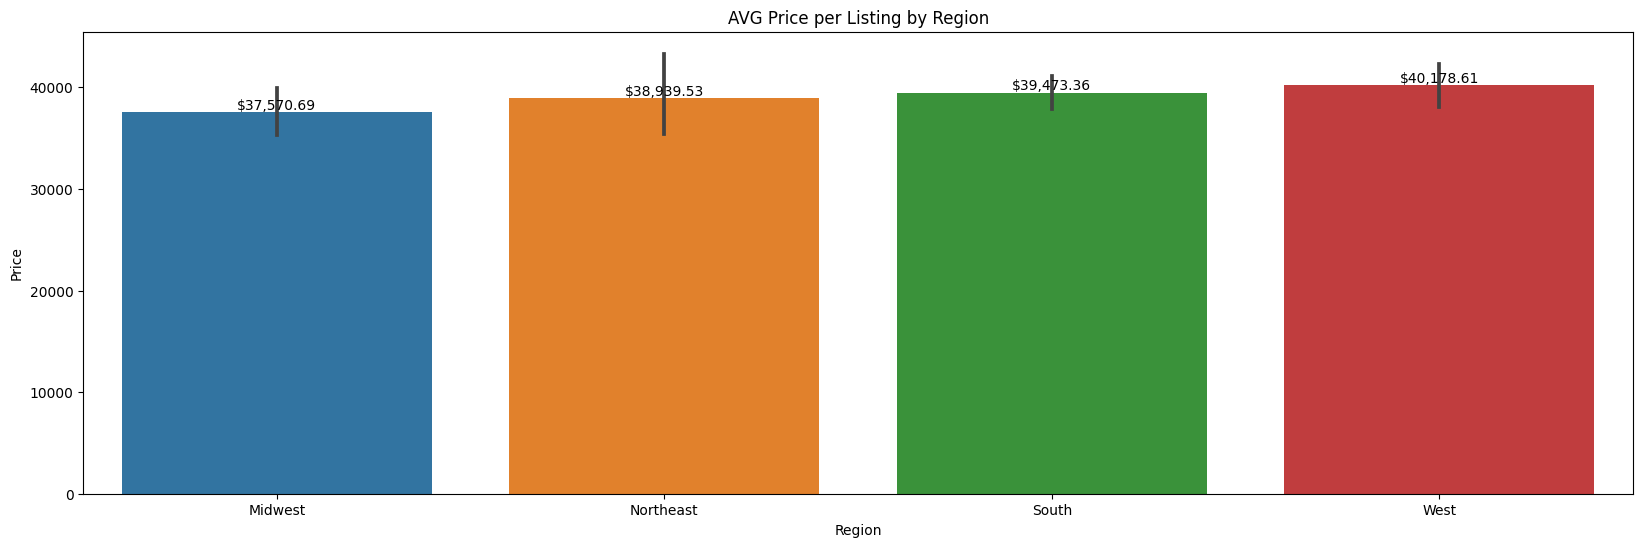

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sns

query4 = """
SELECT Region, State,
AVG(CASE 
    WHEN Price NOT LIKE '$%' THEN NULL 
    ELSE CAST(REPLACE(REPLACE(Price, '$', ''), ',', '') AS DECIMAL(6,2)) 
END) AS Price
FROM car_sales
WHERE State NOT IN (
"AZ-101",
"Bldg",
"Michigan",
"RT",
"SE",
"Suite",
"US-12",
"US-169",
"Glens"
)
GROUP BY State
ORDER BY Region
;
"""

data = pd.read_sql(query4, conn)

plt.figure(figsize=(20, 6))

ax = sns.barplot(x='Region', y='Price', data=data)

for p in ax.patches:
    ax.text(x=p.get_x() + p.get_width() / 2,
            y=p.get_height() + 5,
            s=f"${p.get_height():,.2f}",
            ha='center', va='bottom')
    
plt.title("AVG Price per Listing by Region")

plt.show()

In [62]:
# What are the most common factors that affect car pricing?

q5 = """
SELECT 
Year,
Make,
ExteriorColor,
InteriorColor,
DriveTrain,
Transmission,
FuelType,
CASE 
    WHEN Price NOT LIKE '$%' THEN NULL 
    ELSE CAST(REPLACE(REPLACE(Price, '$', ''), ',', '') AS DECIMAL(6,2)) 
END AS Price
FROM car_sales
GROUP BY Price
;
"""
pd.read_sql(q5,conn)

,Year,Make,ExteriorColor,InteriorColor,Drivetrain,Transmission,FuelType,Price
0,2012,Ford,Black,Charcoal Black,Four-wheel Drive,6-Speed Automatic,E85 Flex Fuel,10499.0
1,2010,Chrysler,Deep Cherry Red Crystal Pearl,–,Front-wheel Drive,Automatic,Gasoline,10775.0
2,2014,Volvo,–,–,–,6-Speed Automatic,Gasoline,10795.0
3,2011,Hyundai,Ash Black,Black,Front-wheel Drive,6-Speed Automatic,Gasoline,10799.0
4,2016,Hyundai,Red,Gray,Front-wheel Drive,6-Speed Automatic with Shiftronic,Gasoline,10899.0
...,...,...,...,...,...,...,...,...
5059,2019,Mercedes-Benz,Polar White,–,All-wheel Drive,9-Speed Automatic,Gasoline,99980.0
5060,2017,Porsche,Agate Gray Metallic,–,Rear-wheel Drive,7-Speed Automatic with Auto-Shift,Gasoline,99985.0
5061,2020,Land,Narvik Black,Espresso,Four-wheel Drive,Automatic,Gasoline,99997.0
5062,2021,Porsche,Carrara White Metallic,Bordeaux Red,Rear-wheel Drive,2-Speed Automatic,Electric,99999.0


IndexError: index 10 is out of bounds for axis 0 with size 4

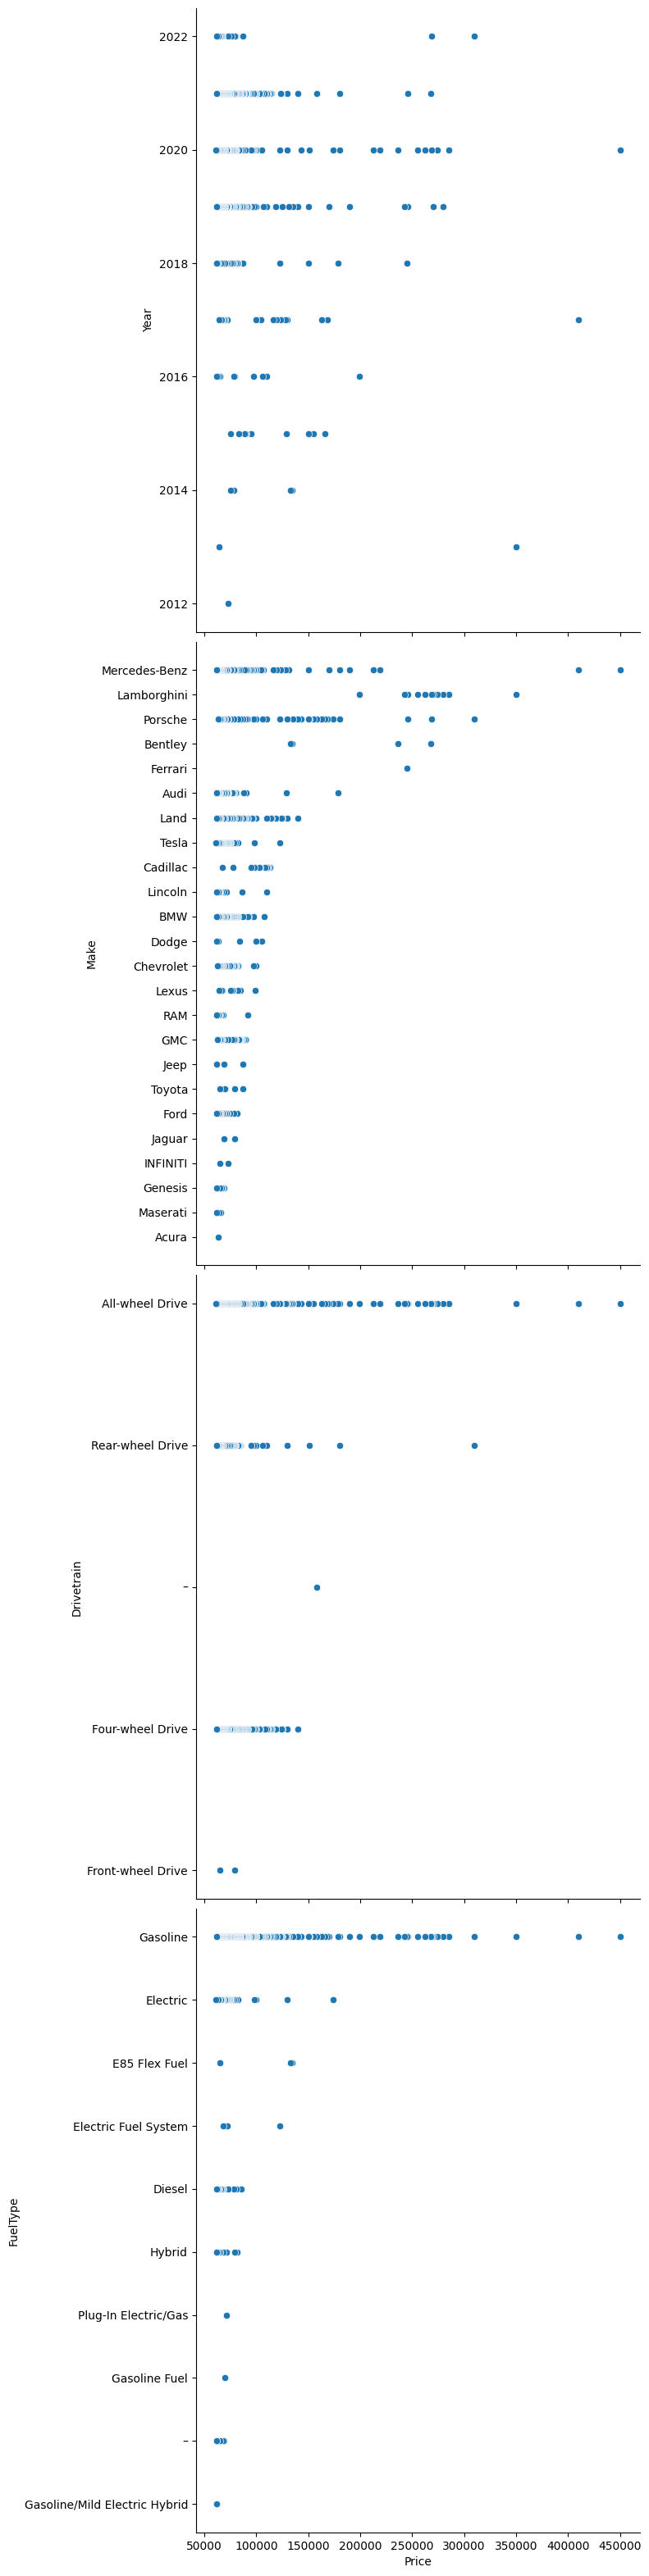

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from SQL query
q5 = """
SELECT 
Year,
Make,
Drivetrain,
FuelType,
CASE 
    WHEN Price NOT LIKE '$%' THEN NULL 
    ELSE CAST(REPLACE(REPLACE(Price, '$', ''), ',', '') AS DECIMAL(6,2)) 
END AS Price
FROM car_sales
WHERE Drivetrain <> 'AWD'
AND Drivetrain <> '4WD'
AND Drivetrain <> 'RWD'
AND Drivetrain <> 'FWD'
GROUP BY ExteriorColor, InteriorColor, Drivetrain, Engine, Transmission, Fueltype
ORDER BY Price DESC
LIMIT 500
"""
df = pd.read_sql(q5, conn)

# Create horizontal scatter plot using Seaborn
plot = sns.pairplot(df, x_vars=['Price'], y_vars=['Year', 'Make', 'Drivetrain', 'FuelType'], height=8)

# Rotate x-axis tick labels
plot.axes[10, 0].set_xticklabels(plot.axes[10, 0].get_xticklabels(), rotation=90)

# Set x-label for all subplots
for ax in plot.axes.flat:
    ax.set(xlabel='Price')

# Show the plot
plt.show()